In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
import gc
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

### IMPORTACION DE DATASET

In [2]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [3]:
#contador = 0
#data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
#n = 3
#for l in parse('C:\\Users\\Usuario\\source\\repos\\steam_reviews.json.gz'):
    #if contador%n == 0:
        #data_reviews.append(l)
#    else:
#          pass
#   contador += 1
    
 


In [4]:
data_games = []
for l in parse('C:\\Users\\Usuario\\source\\repos\\steam_games.json.gz'):
        data_games.append(l)

In [5]:
data_reviews=pd.read_csv('C:\\Users\\Usuario\\source\\data_reviews.csv')

data_games = []
for l in parse('C:\\Users\\Usuario\\source\\repos\\steam_games.json.gz'):
        data_games.append(l)

In [6]:
data_games = pd.DataFrame(data_games)

In [7]:
data_reviews.head()

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,NaN,NaN
2,2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,NaN,NaN
3,3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,NaN,NaN
4,4,Nyc2x,4.3,471.0,35600,0,2014-12-24,A hybrid adventure/puzzle game that will reall...,False,3,NaN,NaN,NaN


### DESCRIPCIÓN DE FEATURES DATA_REVIEWS

**username:** Nombre del usuario que ha dejado la reseña

**hours:** Cantidad de horas jugadas (acumuladas) en el juego al cual se le ha hecho la reseña

**products:** Cantidad de otros juegos probados

**product_id:** Identificacion númerica del juego reseñado

**page_order:** Número de página en el cual se encuentra el juego dentro de la plataforma

**date:** Fecha en la cual se ha creado la reseña

**text:** Comentario sobre el juego

**early_access:** Si es True significa que el juego puede ser adquirido durante su etapa de desarrollo

**page:** No es interpretable

**user_id:** Identificacion númerica del usuario creador de la reseña

**found_funny:** Cantidad de calificaciones positivas creadas por otros usuarios

**compensation:** Variable no interpretable dada la cantidad de valores nulos contenidos en ella


In [8]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


### DESCRIPCIÓN DE FEATURES INCLUIDOS EN DATA_GAMES

**desarrollador:** Creador del juego

**genres:** Géneros, caracteristicas del juego

**app_name:** Editor del juego

**title:** Nombre del juego

**url:** Dirección web donde encontrarlo

**release_date:** Fecha de lanzamiento

**tags:** Etiquetas relacionadas con el juego

**discount_price:** Precio con descuento incluido

**reviews_url:** Dirección web donde encontrar las reseñas sobre el juego

**specs:** Especificaciones

**price:** Precio sin descuento

**early_access:** Si es True significa que el juego puede ser adquirido durante su etapa de desarrollo

**id:** Identificacion númerica del juego publicado

**sentiment:** Emoción promedio generada en los usuarios

**metascore:** Puntaje promedio recibido por los usuarios


### ANALISIS EXPLORATORIO DATA_REVIEWS

In [9]:
data_reviews.head()

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,NaN,NaN
2,2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,NaN,NaN
3,3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,NaN,NaN
4,4,Nyc2x,4.3,471.0,35600,0,2014-12-24,A hybrid adventure/puzzle game that will reall...,False,3,NaN,NaN,NaN


In [10]:
data_reviews.drop('Unnamed: 0',axis=1,inplace=True)

Cantidad de filas y columnas

In [11]:
data_reviews.shape

(77931, 12)

Información del tipo de dato contenido en cada feature

In [12]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77931 entries, 0 to 77930
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   username      77930 non-null  object 
 1   hours         77653 non-null  float64
 2   products      77761 non-null  float64
 3   product_id    77931 non-null  int64  
 4   page_order    77931 non-null  int64  
 5   date          77931 non-null  object 
 6   text          77763 non-null  object 
 7   early_access  77931 non-null  bool   
 8   page          77931 non-null  int64  
 9   user_id       31618 non-null  float64
 10  found_funny   12053 non-null  float64
 11  compensation  1403 non-null   object 
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 6.6+ MB


Estadisticos de las variables númericas que contribuyen a definir la calificación del usuario

In [13]:
data_reviews.loc[:,['hours','products','found_funny']].describe()

,hours,products,found_funny
count,77653.000000,77761.000000,12053.000000
mean,113.382229,236.004295,8.445200
std,395.486481,472.203484,83.994647
min,0.000000,1.000000,1.000000
25%,4.000000,46.000000,1.000000
50%,15.400000,111.000000,1.000000
75%,59.500000,247.000000,3.000000
max,18543.300000,11222.000000,4051.000000


De los estadisticos obtenidos podemos decir que la base de datos contiene valores outlier o que carecen de sentido, mas abajo grafico la ditribución de los features "hours" y "products" con el fin de visualizar la afirmación aquí contenida.

Valores nulos contenidos en cada feature

In [14]:
data_reviews.isna().sum()

username            1
hours             278
products          170
product_id          0
page_order          0
date                0
text              168
early_access        0
page                0
user_id         46313
found_funny     65878
compensation    76528
dtype: int64

Visualización de la distribución de la variable "hours"

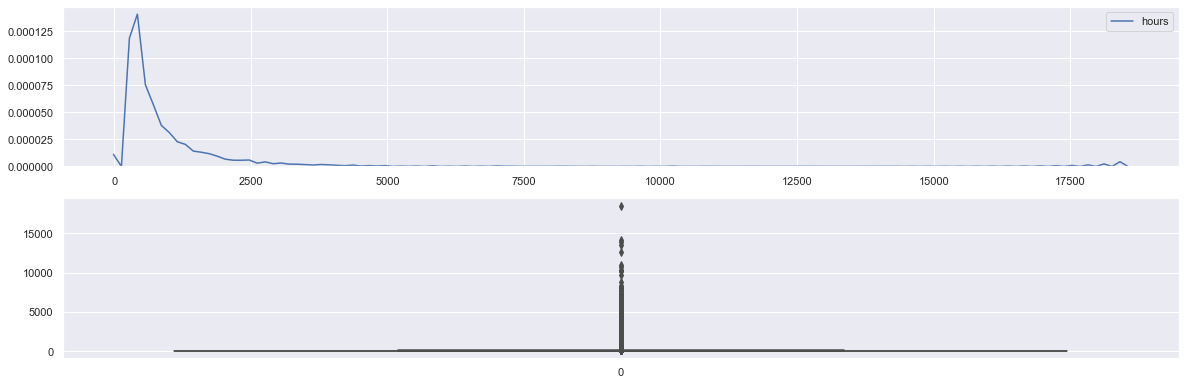

In [15]:

plt.figure(figsize=(20, 10))


plt.subplot(3,1,1)
sns.kdeplot(data=data_reviews.hours)

plt.subplot(3,1,2)
sns.boxplot(data=data_reviews.hours)



Visualización de la distribución de la variable "products"

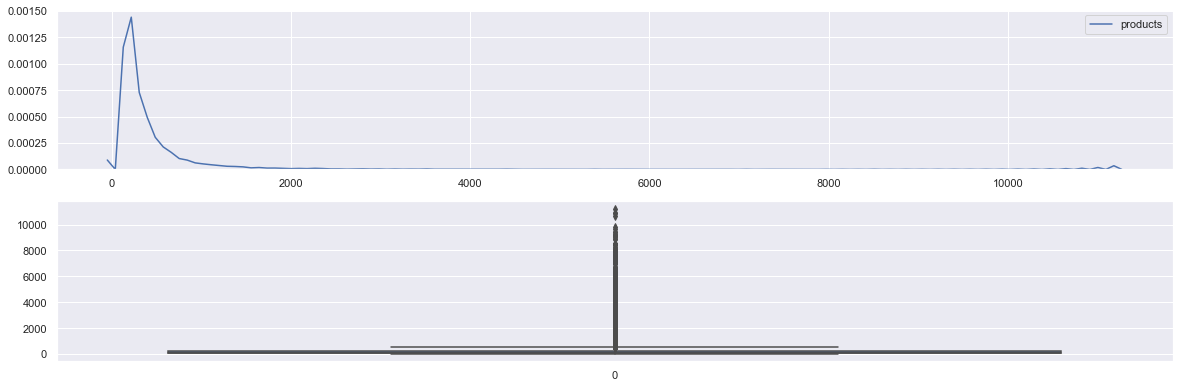

In [16]:
plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.kdeplot(data=data_reviews.products)

plt.subplot(3,1,2)
sns.boxplot(data=data_reviews.products)

In [17]:
data_reviews[data_reviews.username.isna()]

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
13218,NaN,15.1,141.0,240760,3,2016-10-09,Wasteland 2 aka save-load simulator:\n65% of m...,False,38,7.656120e+16,4.0,NaN


Elimino la fila que contiene el username vacío 

In [18]:
data_reviews.drop([13218],axis=0,inplace=True)
data_reviews.reindex()

,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,NaN,NaN
2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,NaN,NaN
3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,NaN,NaN
4,Nyc2x,4.3,471.0,35600,0,2014-12-24,A hybrid adventure/puzzle game that will reall...,False,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
77926,Gm Prodigy cs.money,597.5,105.0,252490,1,2013-12-13,"Very amazing game, much♥♥♥♥♥♥♥s.",True,10175,NaN,NaN,NaN
77927,Chocolate Coconut Cake,188.7,254.0,252490,1,2013-12-12,Terrific Game.,True,10185,NaN,NaN,NaN
77928,Apple Cheesepie,48.7,191.0,252490,1,2013-12-12,"Like minecraft mixed with DayZ, is really fun ...",True,10195,NaN,NaN,NaN
77929,Cleze,1615.0,169.0,252490,1,2013-12-12,Best Survival game,True,10205,NaN,NaN,NaN


Filtro el dataset quitando aquellos features que considero no van a ser útiles para el modelo

In [110]:
data_reviews2=data_reviews.loc[:,['username','hours','products','product_id','text']]

In [111]:
data_reviews2.dropna(inplace=True)

In [112]:
data_reviews2.isna().sum()

username      0
hours         0
products      0
product_id    0
text          0
dtype: int64

In [113]:
data_reviews2.reset_index(inplace=True)

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [114]:
polarity_list=[]
subjective_list=[]
for i in range(len(data_reviews2.text)):
    frase=TextBlob(data_reviews2.text[i])
    polarity=frase.sentiment.polarity
    subjectivity=frase.sentiment.subjectivity
    polarity_list.append(polarity)
    subjective_list.append(subjectivity)

In [115]:
data_reviews2['Polarity']=pd.Series(polarity_list)

In [116]:
data_reviews2['Subjectivity']=pd.Series(subjective_list)

In [117]:
data_reviews2.drop('index',inplace=True,axis=1)

In [118]:
data_reviews2.head()

,username,hours,products,product_id,text,Polarity,Subjectivity
0,Chaos Syren,0.1,41.0,725280,This would not be acceptable as an entertainme...,0.000000,0.000000
1,MrNinjaSquirrel,1.2,1720.0,288690,"""It's like Sudoku, but as a ball!""\nI have to ...",-0.006884,0.544220
2,HeadShot,0.6,1035.0,384210,"I say, colour discrimination. Why is it the re...",-0.179630,0.465608
3,Rapxtor,59.7,1597.0,399660,"Ive always been a fan of the C&C franchise, an...",-0.025644,0.472727
4,Nyc2x,4.3,471.0,35600,A hybrid adventure/puzzle game that will reall...,-0.039236,0.403819


In [119]:
data_reviews2.groupby('Polarity').max()

,username,hours,products,product_id,text,Subjectivity
Polarity,,,,,,
-1.000000,汝OvO,1202.7,6074.0,665490,♥♥♥♥ing terrible,1.000000
-1.000000,Mistake n' Potatoes,1.3,495.0,10680,"Come play as a stupid marine, a cheap♥♥♥♥♥alie...",1.000000
-0.976562,ｍｒ．ｂｌｕｅｓｋｙ,1172.5,3139.0,420290,this game is ♥♥♥♥♥♥ mind blowing..!!!!,0.700000
-0.933333,MyBumHurts,1.0,30.0,487120,Glitchy Terrible graphics... Clunky crap pvp. ...,0.933333
-0.910807,pqarr83,175.4,79.0,301520,PEW!\nPEW! PEW! PEW!\nMy little support tank k...,0.400000
...,...,...,...,...,...,...
0.975000,Plumey,397.1,199.0,645090,paladins very nice!,1.000000
0.976562,sakhinatural,104.7,926.0,669580,Тот же самый КС 1.6 но с сюжетом. Сама задумка...,1.000000
0.976837,THE SEXY HOOVY,625.8,23.0,440,MY ALL TIME FAVORITE GAAAAAAMMMMMMMEEEEEEEEE!!...,0.650000


In [120]:
data_reviews2.username.value_counts()

Alex                     28
Chris                    24
123                      24
Jack                     18
Nick                     17
                         ..
Too_Lazy_Cat              1
jdsrated                  1
Merio                     1
pogal                     1
Morpheus Lincoln Clay     1
Name: username, Length: 71082, dtype: int64

In [121]:
correlacion=data_reviews2.corr()

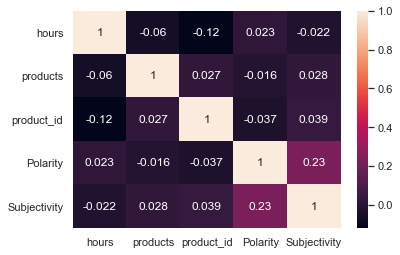

In [122]:
sns.heatmap(correlacion, cbar = True,annot = True)

##Explicar

In [123]:
data_reviews2.describe()

,hours,products,product_id,Polarity,Subjectivity
count,77314.000000,77314.000000,77314.000000,77314.000000,77314.000000
mean,113.439038,235.072833,251667.819347,0.103110,0.467838
std,395.558966,470.833055,150369.137429,0.275693,0.224914
min,0.000000,1.000000,10.000000,-1.000000,0.000000
25%,4.000000,46.000000,203635.000000,-0.003722,0.393056
50%,15.400000,111.000000,252490.000000,0.075000,0.500000
75%,59.575000,246.000000,346110.000000,0.230769,0.594619
max,18543.300000,11222.000000,763410.000000,1.000000,1.000000


Criterio determinacion de Score: **Si la cantidad de productos está dentro de los valores del primer cuartil y la cantidad de horas jugadas está en el 3er cuartil---> Calificación positiva (corroborado con el indice de polaridad)

**Si la cantidad de productos está dentro de los valores del tercer cuartil y la cantidad de horas jugadas está en el 1er cuartil---> Calificación negativa (corroborado con el índice de polaridad)



In [124]:
positive_mask= (data_reviews2.hours>59.75) & (data_reviews2.products<46)


In [247]:
data_reviews2[positive_mask].Polarity.mean()

0.13117870234093953

El resultado obtenido es considerado suficiente para determinar como minimo de polaridad con la que un usuario calificaría como positivo al juego ya que, 0.13 es mayor al promedio de polaridad y, dado que la polaridad es un número que oscila entre -1 y 1 siendo -1 negativo y 1 positvo, el valor obtenido se encuentra mas cercano al extremo positivo que al extremo negativo

In [248]:
negative_mask=(data_reviews2.hours<4) & (data_reviews2.products>246)

In [249]:
data_reviews2[negative_mask].Polarity.mean()

0.0567740481140225

In [250]:
undefined_mask=(data_reviews2.Polarity<0.13117870234093953) & (data_reviews2.Polarity>0.0567740481140225)

In [251]:
data_reviews2[undefined_mask]

,username,hours,products,product_id,text,Polarity,Subjectivity,Calif
9,stazboy,8.1,148.0,350280,Make it free to play such a fun game needs people,0.075000,0.475000,2
12,SOL Ranger,61.2,229.0,399660,As a big fan of C&C Generals it had initial po...,0.066935,0.539405,2
14,torrent of a goose,14.8,225.0,365560,"well, i m still only into the second day of th...",0.092899,0.580745,2
15,B A R A B A J A G A L,0.7,291.0,574640,I wasn't expecting too much but I was pleasant...,0.120000,0.511429,2
23,Rustü,22.5,448.0,531780,Even though I recieved this game for free and ...,0.066453,0.537778,2
...,...,...,...,...,...,...,...,...
77275,Big Hutch,4.6,290.0,252490,"This game is really early development, but if ...",0.097143,0.347143,2
77276,Big Hutch,4.6,290.0,252490,"This game is really early development, but if ...",0.097143,0.347143,2
77280,Deityrob,26.4,241.0,252490,""".... It's in our interest to make the game aw...",0.066667,0.600000,2
77300,Offline Soup Man,3.8,79.0,252490,I would wait a lot longer before buying this g...,0.082396,0.562301,2


In [252]:
data_reviews2.shape

(77314, 8)

In [253]:
9882/77314

0.12781643686783764

In [254]:
def conditions(data):
    if (data['Polarity'] > 0.13117870234093953):
        return 3
    elif (data['Polarity'] < 0.0567740481140225):
        return 1
    else:
        return 2

In [255]:
data_reviews2['Calif'] = data_reviews2.apply(conditions, axis=1)

In [256]:
data_reviews2

,username,hours,products,product_id,text,Polarity,Subjectivity,Calif
0,Chaos Syren,0.1,41.0,725280,This would not be acceptable as an entertainme...,0.000000,0.000000,1
1,MrNinjaSquirrel,1.2,1720.0,288690,"""It's like Sudoku, but as a ball!""\nI have to ...",-0.006884,0.544220,1
2,HeadShot,0.6,1035.0,384210,"I say, colour discrimination. Why is it the re...",-0.179630,0.465608,1
3,Rapxtor,59.7,1597.0,399660,"Ive always been a fan of the C&C franchise, an...",-0.025644,0.472727,1
4,Nyc2x,4.3,471.0,35600,A hybrid adventure/puzzle game that will reall...,-0.039236,0.403819,1
...,...,...,...,...,...,...,...,...
77309,Gm Prodigy cs.money,597.5,105.0,252490,"Very amazing game, much♥♥♥♥♥♥♥s.",0.190000,0.700000,3
77310,Chocolate Coconut Cake,188.7,254.0,252490,Terrific Game.,-0.200000,0.700000,1
77311,Apple Cheesepie,48.7,191.0,252490,"Like minecraft mixed with DayZ, is really fun ...",0.120000,0.390000,2
77312,Cleze,1615.0,169.0,252490,Best Survival game,0.300000,0.350000,3


In [324]:
data_reviews_ok=data_reviews2.loc[:,['username','product_id','Calif']]

In [325]:
a=pd.DataFrame({'id':data_reviews_ok.product_id.unique()})
a

,id
0,725280
1,288690
2,384210
3,399660
4,35600
...,...
6588,253840
6589,252250
6590,263400
6591,460340


In [326]:
reader=Reader()

In [327]:
data=Dataset.load_from_df(data_reviews_ok[['username','product_id','Calif']],reader=reader)

In [328]:
trainset,testset=train_test_split(data,test_size=.3)

In [329]:
algo=SVD()

In [330]:
algo.fit(trainset)

In [331]:
prediction=algo.test(testset)

In [332]:
usuario='Alex'

In [340]:
recomendaciones_usuario=data_games.loc[:,['id','title']]

In [341]:
recomendaciones_usuario['_id']=recomendaciones_usuario['id']

In [343]:
recomendaciones_usuario.set_index('_id')

,id,title
_id,,
761140,761140,Lost Summoner Kitty
643980,643980,Ironbound
670290,670290,Real Pool 3D - Poolians
767400,767400,弹炸人2222
773570,773570,NaN
...,...,...
773640,773640,Colony On Mars
733530,733530,LOGistICAL: South Africa
610660,610660,Russian Roads


In [345]:
usuario_vistas=data_reviews_ok[data_reviews_ok['username']==usuario]

In [349]:
usuario_vistas['_product_id']=usuario_vistas['product_id']
usuario_vistas.set_index('_product_id')

<ipython-input-349-a3f340e9a968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_vistas['_product_id']=usuario_vistas['product_id']


,username,product_id,Calif
_product_id,,,
531960,Alex,531960,1
225080,Alex,225080,3
4000,Alex,4000,3
588430,Alex,588430,2
326460,Alex,326460,1
363930,Alex,363930,3
323470,Alex,323470,1
244870,Alex,244870,3
342980,Alex,342980,1


In [350]:
brecomendaciones_usuario=recomendaciones_usuario.drop(usuario_vistas.product_id.index)

KeyError: '[33384 33693 33993 37862 38060 39380 40330 40357 45157 46088 46932 47793\n 48122 48550 52246 55408 57535 59722 74343 74513] not found in axis'

In [351]:
usuario_vistas.product_id.index

Int64Index([ 1293,  1404, 10993, 13039, 17229, 20369, 27285, 27975, 33384,
            33693, 33993, 37862, 38060, 39380, 40330, 40357, 45157, 46088,
            46932, 47793, 48122, 48550, 52246, 55408, 57535, 59722, 74343,
            74513],
           dtype='int64')

In [318]:
usuario_vistas

,username,product_id,Calif
1293,Alex,531960,1
1404,Alex,225080,3
10993,Alex,4000,3
13039,Alex,588430,2
17229,Alex,326460,1
20369,Alex,363930,3
27285,Alex,323470,1
27975,Alex,244870,3
33384,Alex,342980,1
33693,Alex,67370,1


In [304]:
recomendaciones_usuario.shape

(77286, 3)

In [305]:
a['Score_model']=a['id'].apply(lambda x: algo.predict(usuario,x).est)

In [306]:
a

,id,Score_model
0,725280,1.933641
1,288690,1.856932
2,384210,1.856192
3,399660,2.004208
4,35600,1.933641
...,...,...
6588,253840,2.036305
6589,252250,1.902608
6590,263400,1.949746
6591,460340,1.801516


In [286]:
a['game_name']=title_id['title'].loc[a.id].values

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([725280, 288690, 384210, 399660,  35600,\n            ...\n            253840, 252250, 263400, 460340, 518790],\n           dtype='int64', length=6116). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [294]:
title_id['title'].loc[a.id]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([725280, 288690, 384210, 399660,  35600,\n            ...\n            253840, 252250, 263400, 460340, 518790],\n           dtype='int64', length=6116). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [293]:
title_id

,id,title,Score_model
0,761140,Lost Summoner Kitty,1.864787
1,643980,Ironbound,1.864787
2,670290,Real Pool 3D - Poolians,1.864787
3,767400,弹炸人2222,1.864787
4,773570,NaN,1.864787
...,...,...,...
32130,773640,Colony On Mars,1.864787
32131,733530,LOGistICAL: South Africa,1.864787
32132,610660,Russian Roads,1.864787
32133,658870,EXIT 2 - Directions,1.864787


In [291]:
a.id

0       725280
1       288690
2       384210
3       399660
4        35600
         ...  
6588    253840
6589    252250
6590    263400
6591    460340
6592    518790
Name: id, Length: 6593, dtype: int64

In [189]:
algo.predict(usuario,733530)

Prediction(uid='Alex', iid=733530, r_ui=None, est=1.86478742145736, details={'was_impossible': False})

In [109]:
accuracy.rmse(prediction)

RMSE: 0.9231


0.9231419729400818

In [62]:
rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(f'\nNúmero de Factores: {factor}')
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))


Número de Factores: 1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9228  0.9259  0.9238  0.9242  0.0013  
Fit time          0.97    1.05    1.08    1.03    0.04    
Test time         0.29    0.16    0.16    0.20    0.06    

Número de Factores: 2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9251  0.9249  0.9230  0.9243  0.0009  
Fit time          1.32    1.08    1.08    1.16    0.11    
Test time         0.28    0.16    0.18    0.21    0.05    

Número de Factores: 4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9245  0.9245  0.9219  0.9236  0.0012  
Fit time          1.06    1.30    1.16    1.17    0.10    
Test time         0.30    0.16    0.16    0.20    0.07    

Número de Factores: 8
Evaluating RMSE of algorithm SVD on 3 split(s).

    

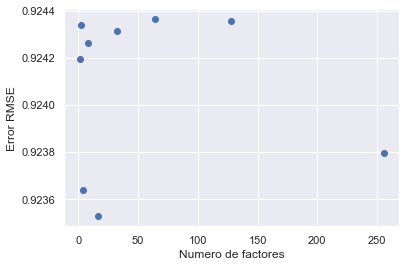

In [63]:
plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [64]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)


In [65]:
gs.fit(data)

In [66]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9218938043108785
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.2}


In [67]:
#-----------------------------------------------------------------------------------------------#

In [68]:
n_usuarios=len(data_rev.reset_index(drop=True).iloc[0:1000])
n_items=len(data_games.id)
usuarios=data_rev.iloc[0:1000].username
items=data_games.id

NameError: name 'data_rev' is not defined

In [ ]:
user=data_reviews_ok.username.value_counts()[data_reviews_ok.username.value_counts()>3].index
items=title_id.id.unique()
n_user=len(user)
n_items=len(items)

In [ ]:
matriz_utilidad=pd.DataFrame(np.zeros((n_user,n_items)), index=user, columns=items).astype(pd.SparseDtype('float'))
matriz_utilidad

In [ ]:
for column in matriz_utilidad:
    spdtypes=matriz_utilidad.dtypes[column]
    
    matriz_utilidad[column] = matriz_utilidad[column].sparse.to_dense()
    
    
    mask_calif_columns=items==column
    calificaciones_column=data_reviews_ok.username.value_counts()[data_reviews_ok.username.value_counts()>3]
    
    
    matriz_utilidad[column].loc[calificaciones_column.index]=calificaciones_column
    

In [ ]:
items

In [ ]:
data_reviews_ok[data_reviews_ok.username.value_counts()>3]